###IRIS flower detection/prediction using DECISION TREE CLASSIFIER ALGORITHM

#### *Importing Liabraries*

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### *Loading Dataset*

In [56]:
df=pd.read_csv("Iris.csv")

In [57]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [59]:
df.shape

(150, 5)

#### Encoding the Label 'Species'

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['species']=label_encoder.fit_transform(df['species'])

In [73]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [74]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [75]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [63]:
X=df.iloc[:,:-1].values

In [64]:
Y=df.iloc[:,-1]

#### Splitting dataset into Training and Testing data

In [76]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [77]:
X_train

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [67]:
Y_train

60     1
116    2
144    2
119    2
108    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: species, Length: 105, dtype: int32

### Finding best max_depth value

In [80]:
accuracy=[]
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

for i in range (1,10):
    model=DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(X_train,Y_train)
    pred=model.predict(x_test)
    score=accuracy_score(y_test,pred)
    accuracy.append(score)

In [81]:
accuracy

[0.6,
 0.9111111111111111,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

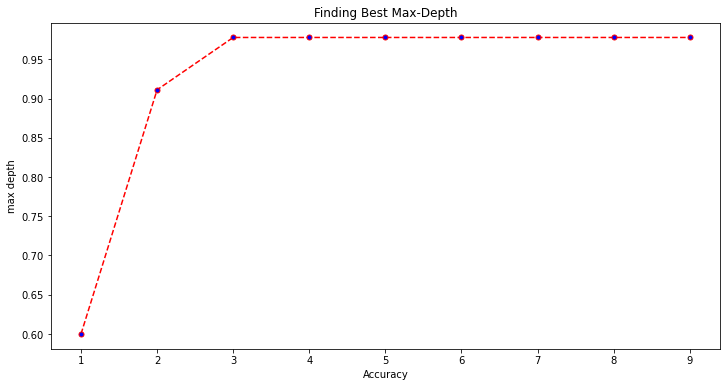

In [82]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10),accuracy,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=5)
plt.title('Finding Best Max-Depth')
plt.xlabel('Accuracy')
plt.ylabel('max depth')
plt.show()

### Training Decision Tree Classifier Algorithm with max_depth=3

In [83]:
model_DTC=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
model_DTC.fit(X_train,Y_train)
pred_DTC=model.predict(x_test)

### Getting Accuracy Score for model with max_depth=3

In [84]:
accuracy_score(pred_DTC,y_test)

0.9777777777777777

In [85]:
cm=confusion_matrix(pred_DTC, y_test)
cm

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]], dtype=int64)